Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


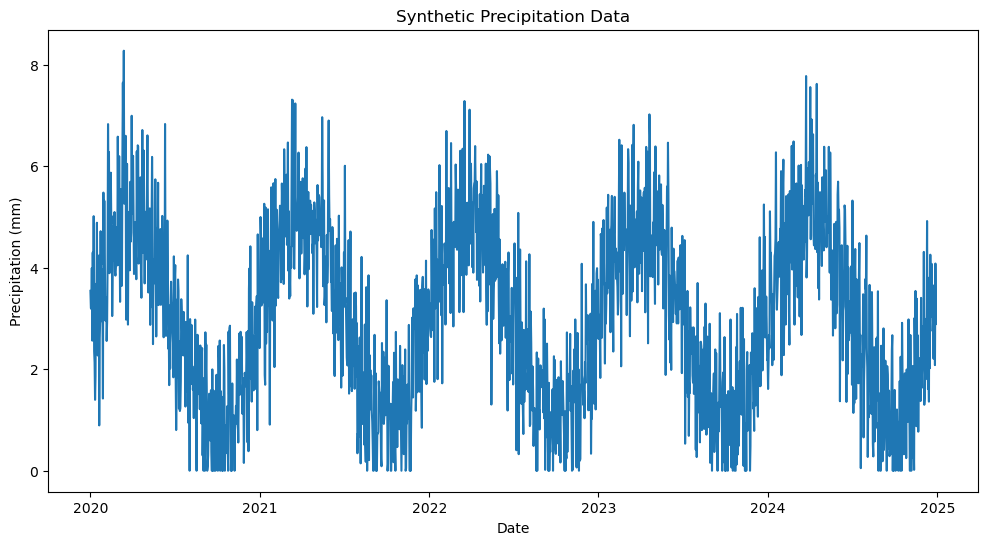

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to generate synthetic precipitation data
def generate_precipitation_data(years=5, start_year=2020):
    # Define the number of days per year (assuming no leap years for simplicity)
    days_per_year = 365

    # Create a date range for the specified number of years
    dates = pd.date_range(start=f'{start_year}-01-01', periods=years*days_per_year)

    # Create a baseline seasonal cycle of precipitation (sinusoidal)
    # This simulates higher precipitation in certain months
    seasonal_cycle = np.sin(2 * np.pi * dates.dayofyear / days_per_year)

    # Add a stochastic component using Gaussian noise
    stochastic_component = np.random.normal(0, 1, size=len(dates))

    # Combine the seasonal and stochastic components to get the final precipitation data
    # Adjust the amplitude and mean to realistic values (e.g., mean=3, amplitude=2)
    mean_precipitation = 3
    amplitude = 2
    precipitation_data = mean_precipitation + amplitude * seasonal_cycle + stochastic_component

    # Ensure all precipitation values are non-negative
    precipitation_data = np.maximum(precipitation_data, 0)

    # Create a DataFrame
    df = pd.DataFrame({'Date': dates, 'Precipitation': precipitation_data})
    df.set_index('Date', inplace=True)

    return df

# Generate precipitation data for 5 years starting from 2020
precipitation_df = generate_precipitation_data()

# Plot the generated data
plt.figure(figsize=(12, 6))
plt.plot(precipitation_df.index, precipitation_df['Precipitation'])
plt.title('Synthetic Precipitation Data')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.show()


In [2]:
# Generate precipitation data for 5 years starting from 2020
precipitation_df = generate_precipitation_data()
modified_df = precipitation_df.copy(deep=True)

precipitation_df['Total Record Anomaly'] = precipitation_df['Precipitation'] - precipitation_df['Precipitation'].mean() 
precipitation_df['Annual Anomaly'] = precipitation_df['Precipitation'] - precipitation_df.groupby(modified_df.index.year)['Precipitation'].transform('mean')
precipitation_df['Difference'] = precipitation_df['Total Record Anomaly'] - precipitation_df['Annual Anomaly']



modified_df['Precipitation'].loc['2023'] = modified_df['Precipitation'].loc['2023'].apply(lambda x: x - np.random.uniform(x - modified_df['Precipitation'].loc['2023'].mean(), x))
modified_df['Total Record Anomaly'] = modified_df['Precipitation'] - modified_df['Precipitation'].mean() 
modified_df['Annual Anomaly'] = modified_df['Precipitation'] - modified_df.groupby(modified_df.index.year)['Precipitation'].transform('mean')
modified_df['Difference'] = modified_df['Total Record Anomaly'] - modified_df['Annual Anomaly']


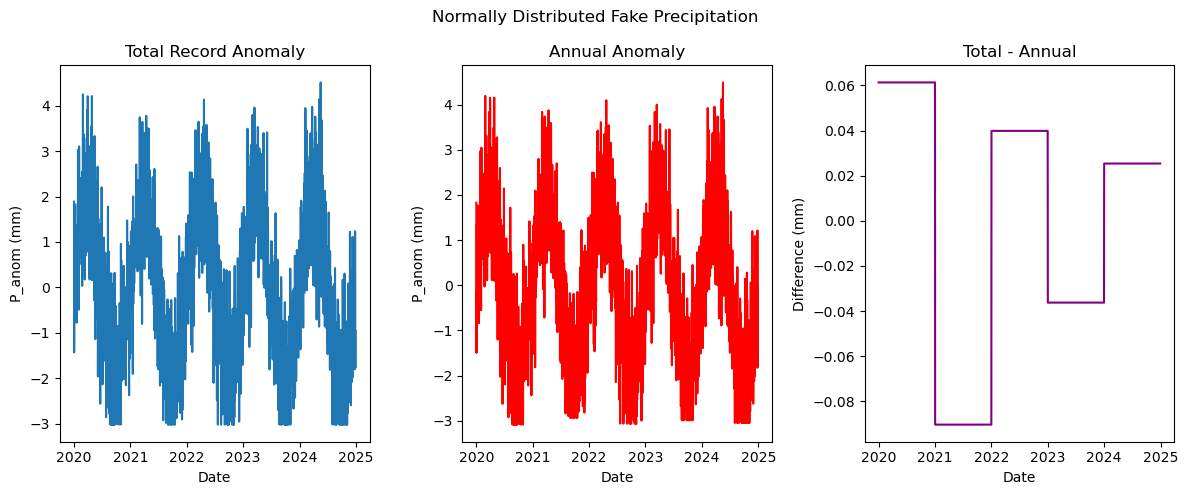

In [3]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 5))

# Plotting data on the first subplot
ax1.plot(precipitation_df.index, precipitation_df['Total Record Anomaly'])
ax1.set_title('Total Record Anomaly')
ax1.set_xlabel('Date')
ax1.set_ylabel('P_anom (mm)')

# Plotting data on the second subplot
ax2.plot(precipitation_df.index, precipitation_df['Annual Anomaly'], 'r')  # 'r' for red color
ax2.set_title('Annual Anomaly')
ax2.set_xlabel('Date')
ax2.set_ylabel('P_anom (mm)')

ax3.plot(precipitation_df.index,precipitation_df['Difference'], color='purple')
ax3.set_title('Total - Annual')
ax3.set_xlabel('Date')
ax3.set_ylabel('Difference (mm)')

# Show the plot
plt.suptitle('Normally Distributed Fake Precipitation')
plt.tight_layout()  # Adjusts the plots to fit into the figure area.
plt.show()

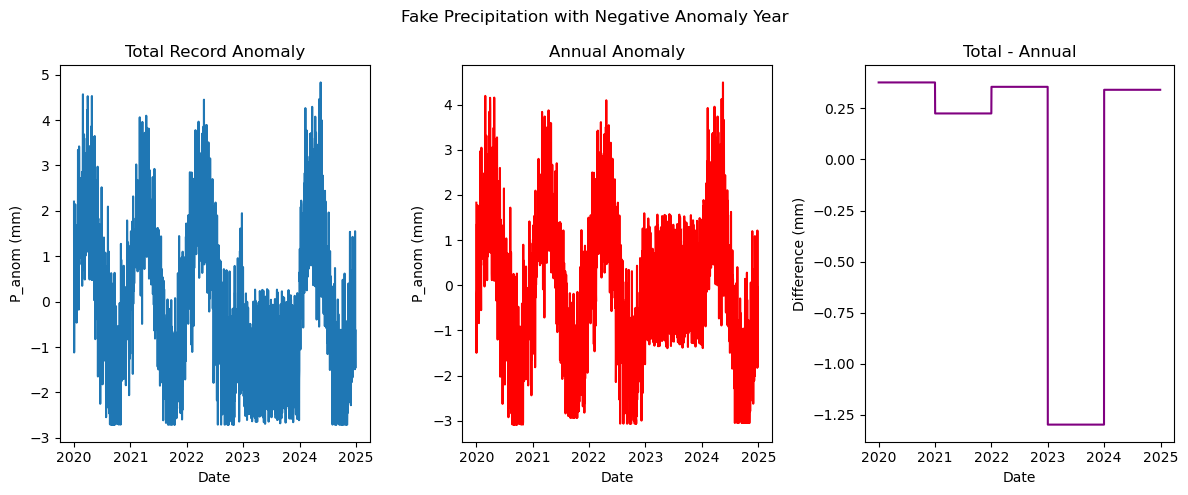

In [4]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 5))

# Plotting data on the first subplot
ax1.plot(modified_df.index, modified_df['Total Record Anomaly'])
ax1.set_title('Total Record Anomaly')
ax1.set_xlabel('Date')
ax1.set_ylabel('P_anom (mm)')

# Plotting data on the second subplot
ax2.plot(modified_df.index, modified_df['Annual Anomaly'], 'r')  # 'r' for red color
ax2.set_title('Annual Anomaly')
ax2.set_xlabel('Date')
ax2.set_ylabel('P_anom (mm)')

ax3.plot(modified_df.index, modified_df['Difference'], color='purple')
ax3.set_title('Total - Annual')
ax3.set_xlabel('Date')
ax3.set_ylabel('Difference (mm)')

# Show the plot
plt.suptitle('Fake Precipitation with Negative Anomaly Year')
plt.tight_layout()  # Adjusts the plots to fit into the figure area.
plt.show()